9. Use the Adm_Pred.csv dataset
a) Read all the dataset using a dataframe
b) Update Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.
c) Perform 80-20, 70-30 and 65-35 division for train and test set
d) Apply Linear Regression classifier and display Accuracy
e) Generate Confusion matrix
f) Display Precision, Recall, F1-Score , Sensitivity , Specificity , Kappa stat .
g) Generate a bar graph for 3 accuracies obtained

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
import matplotlib.pyplot as plt

In [ ]:
# a) Load the dataset
data = pd.read_csv('./Adm_Pred.csv')

In [ ]:
#b)
data['Admitted'] = (data['Chance of Admit '] >= 0.5).astype(int)

# Drop unnecessary columns for model training (e.g., Serial No., Chance of Admit)
data_cleaned = data.drop(columns=['Serial No.', 'Chance of Admit '])

# Independent variables (features) and the target variable
X = data_cleaned.drop(columns=['Admitted'])
y = data_cleaned['Admitted']

In [ ]:
# c) Train-Test Splits

splits = {
    '80-20': train_test_split(X, y, test_size=0.2, random_state=42),
    '70-30': train_test_split(X, y, test_size=0.3, random_state=42),
    '65-35': train_test_split(X, y, test_size=0.35, random_state=42)
}

In [10]:
# d) Linear Regression Classifier
# e) Generate Confusion matrix
# f) Display Precision, Recall, F1-Score , Sensitivity , Specificity , Kappa stat .

linear_accuracies = {}
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    # Initialize and fit Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    # Predict
    y_pred = lin_reg.predict(X_test)
    y_pred = np.round(y_pred)  # Round to get binary predictions
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    linear_accuracies[split_name] = accuracy
    
    # Display Results
    print(f"\nLinear Regression - {split_name} Split")
    print(f"Accuracy: {accuracy:.2f}")



Linear Regression - 80-20 Split
Accuracy: 0.91

Linear Regression - 70-30 Split
Accuracy: 0.91

Linear Regression - 65-35 Split
Accuracy: 0.91


In [11]:
# e) Generate Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[  0  16]
 [  0 159]]


In [12]:
 #f) Display Precision, Recall, F1-Score , Sensitivity , Specificity , Kappa stat.
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Kappa:", cohen_kappa_score(y_test, y_pred))

Precision: 0.9085714285714286
Recall: 1.0
F1-Score: 0.9520958083832335
Kappa: 0.0


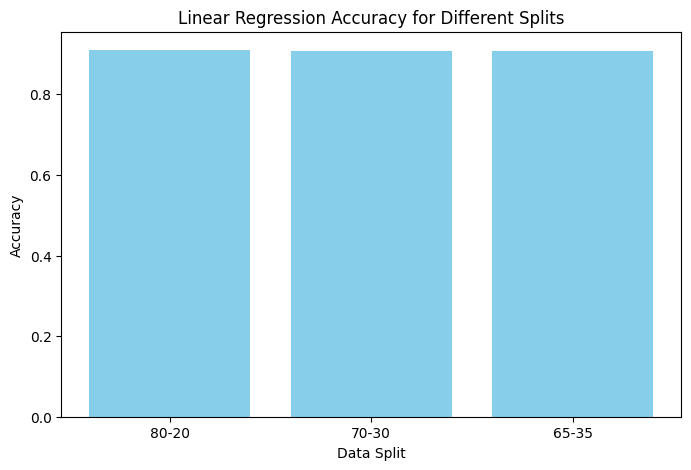

In [7]:
# d) Plot accuracy results
plt.figure(figsize=(8, 5))
plt.bar(linear_accuracies.keys(), linear_accuracies.values(), color='skyblue')
plt.xlabel('Data Split')
plt.ylabel('Accuracy')
plt.title('Linear Regression Accuracy for Different Splits')
plt.show()